План работы:
 - проанализировать данные;
 - использовать PCA для визиуализации объектов в пространстве;
 - определить ключевые свойства, влияющие на кластеризацию
 - на основе распределения, использовать лучшую модель - XGBoost, RandomForest(думаю форест отлично справится);
 - найти гиперпараметры для лучшей модели

In [1]:
import pandas as pd
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import shap

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
f = open('Project_2_path.txt','r',encoding='utf8')
dir_name = f.readline()
f.close()

# 1.Dowloading and basic infromation

In [3]:
df = pd.read_csv(dir_name)

In [4]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


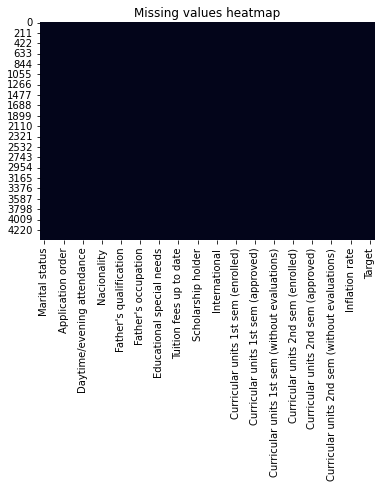

In [6]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

plt.show()

# 2.Scaling and visualizing dataset with PCA

In [7]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [8]:
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [9]:
df['Target']

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [10]:
df.groupby('Course')[['Target']].mean()

,Target
Course,
1,0.416667
2,1.065116
3,1.241860
4,1.004762
5,1.362832
6,1.243323
7,0.541176
8,0.744681
9,1.010526


In [11]:
df.pivot_table('Target', ['Course', 'Gender'], aggfunc=np.mean)

Target
Course Gender          
1      0       1.000000
       1       0.222222
2      0       1.112245
       1       1.025641
3      0       1.283237
       1       1.071429
4      0       1.278689
       1       0.892617
5      0       1.484615
       1       1.197917
6      0       1.335740
       1       0.816667
7      0       0.142857
       1       0.558282
8      0       0.860759
       1       0.596774
9      0       1.215596
       1       0.734568
10     0       1.595469
       1       0.978261
11     0       1.203947
       1       0.880000
12     0       1.614263
       1       1.342282
13     0       1.164179
       1       0.578947
14     0       1.260274
       1       0.934426
15     0       1.347222
       1       1.173913
16     0       0.857923
       1       0.777778
17     0       0.893939
       1       0.676471

In [12]:
scaler = StandardScaler()
without_label = df.drop('Target',axis =1)
scaler.fit(without_label)

StandardScaler()

In [13]:
scaled_data = scaler.transform(without_label)
scaled_data

array([[-0.29482875,  0.21006857,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.16740639, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.11109377, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.35614386, -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

In [14]:
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [15]:
data_pca = pca.transform(scaled_data)
pca_df = pd.DataFrame(data_pca, columns = ['PCA1','PCA2','PCA3'])
pca_df

,PCA1,PCA2,PCA3
0,-5.616263,-0.191377,0.856088
1,-0.299552,-0.946697,1.938401
2,-4.018853,0.510824,-0.112428
3,0.414862,-1.073874,-0.621231
4,0.375114,2.699582,-2.521919
...,...,...,...
4419,-0.151683,-1.933022,1.482513
4420,-1.038089,-1.006610,2.453630
4421,0.669516,-1.014431,-1.949672
4422,-0.563972,-1.701920,-1.257975


In [16]:
data_pca.shape

(4424, 3)

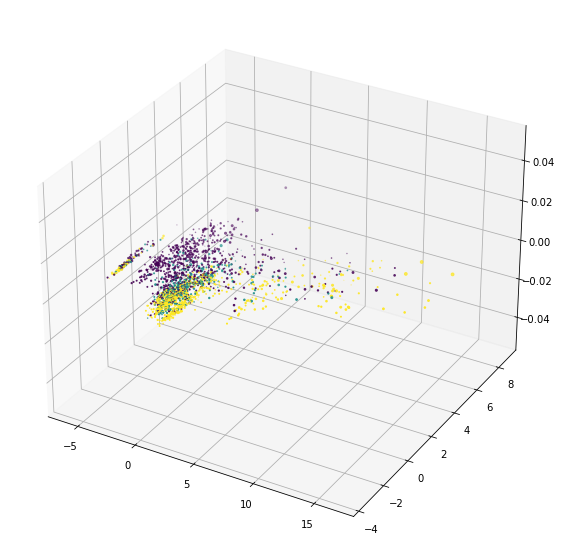

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(
                pca_df['PCA1'],
                pca_df['PCA2'],
                pca_df['PCA3'],
                c=df['Target'])
plt.show()

# 3.Choosing most important features

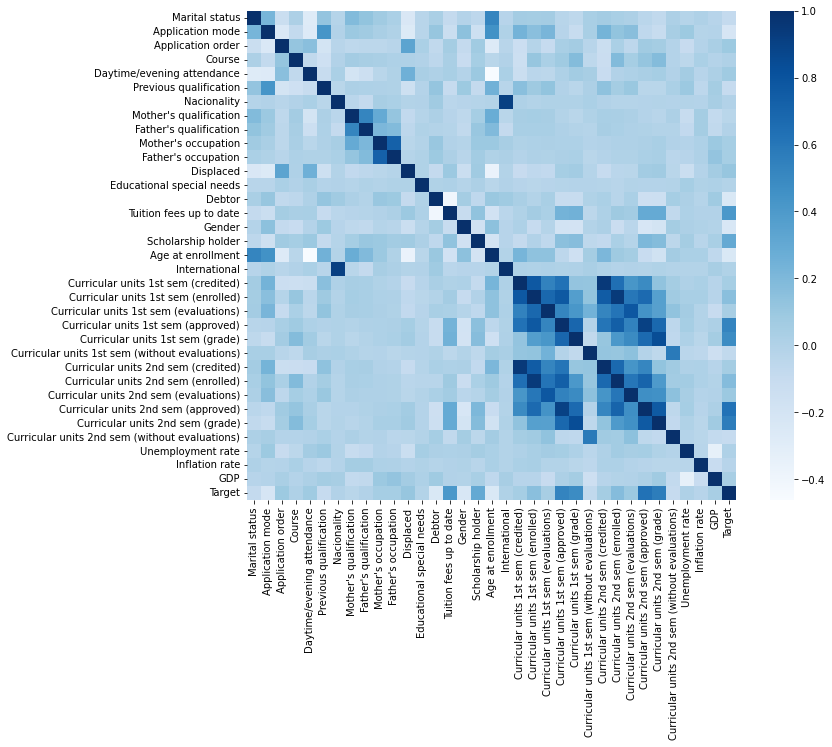

In [18]:
corrmat =  df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, cmap ='Blues');

plt.show()

In [19]:
corrmat.sort_values(by='Target', ascending=True)['Target']

Age at enrollment                                -0.243438
Debtor                                           -0.240999
Gender                                           -0.229270
Application mode                                 -0.212025
Curricular units 2nd sem (without evaluations)   -0.094028
Previous qualification                           -0.091365
Marital status                                   -0.089804
Curricular units 1st sem (without evaluations)   -0.068702
Mother's qualification                           -0.038346
Inflation rate                                   -0.026874
Educational special needs                        -0.007353
Nacionality                                      -0.004740
Father's qualification                            0.000329
International                                     0.003934
Course                                            0.007841
Unemployment rate                                 0.008627
GDP                                               0.0441

In [20]:
def compu_percentage(array):
    return np.count_nonzero(array)/len(array)

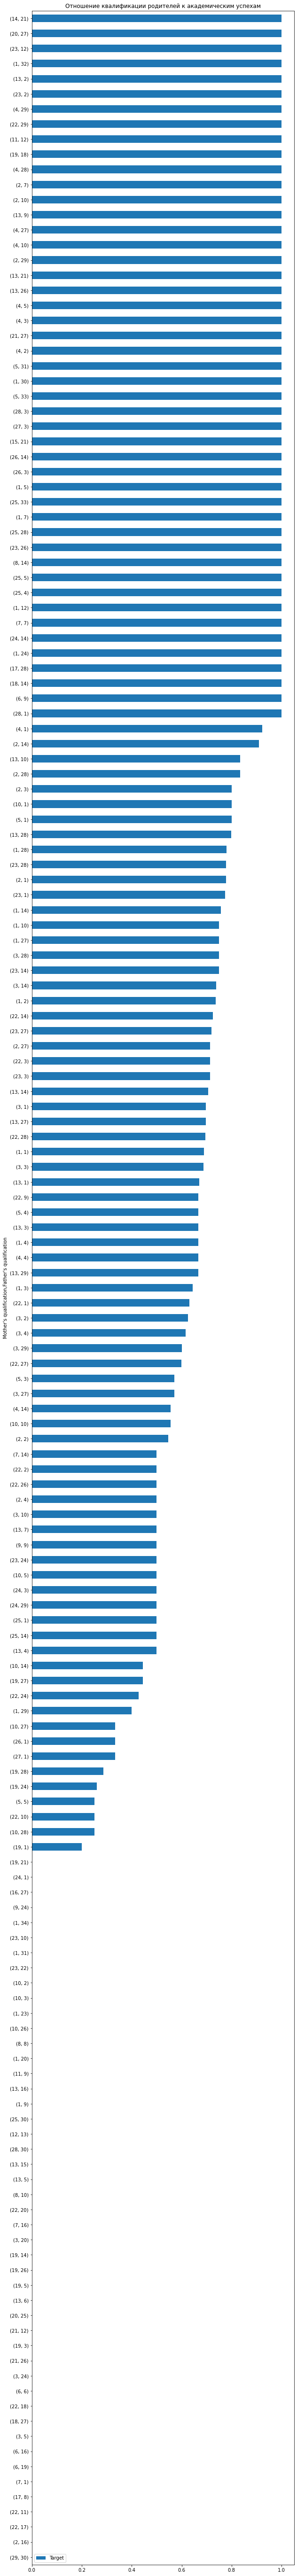

In [21]:
df.pivot_table('Target',['Mother\'s qualification','Father\'s qualification'], aggfunc=compu_percentage).sort_values(by ='Target').\
plot.barh(figsize=(10,100),title ='Отношение квалификации родителей к академическим успехам')

plt.show()

In [22]:
def top_featuers(correlations,rate = 0.15):
    feature_names = [feature for feature in correlations['Target'].keys()]
    new_features = []
    for ind,feature in enumerate(feature_names):
        if abs(correlations['Target'][ind])>rate:
            new_features.append(feature)
    new_features_number = [idx for idx,name in enumerate(feature_names) if name in new_features]
    return new_features, new_features_number

In [23]:
new_feat, new_feat_n = top_featuers(corrmat,rate = 0.09)
print(new_feat_n)
new_feat

[1, 5, 11, 13, 14, 15, 16, 17, 20, 22, 23, 26, 27, 28, 29, 30, 34]


['Application mode',
 'Previous qualification',
 'Displaced',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Target']

In [24]:
feature_df = df.iloc[:,new_feat_n].drop(['Target'], axis=1)
feature_df

,Application mode,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,8,1,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0
1,6,1,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0
2,1,1,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0
3,8,1,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0
4,12,1,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0
4420,1,1,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0
4421,1,1,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0
4422,1,1,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0


In [25]:
labels = df['Target']
labels

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [26]:
X_train, X_val, y_train, y_val = train_test_split(feature_df, labels, test_size=0.2)

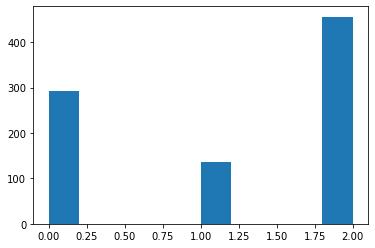

In [27]:
plt.hist(y_val)

plt.show()

# 4.Using XGBoost and Random Forest

## RandomForest

RF Accuracy: 77.51%
The cross validated score for Random forest is: 76.43


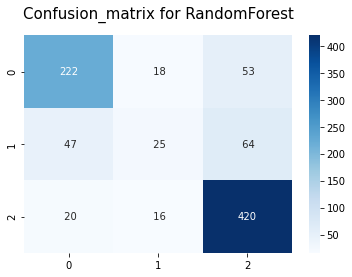

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       293
           1       0.42      0.18      0.26       136
           2       0.78      0.92      0.85       456

    accuracy                           0.75       885
   macro avg       0.66      0.62      0.62       885
weighted avg       0.72      0.75      0.73       885



In [28]:
model_rf = RandomForestClassifier(n_estimators=150,
                                  criterion='entropy',
                                  oob_score= True, 
                                  random_state= 2023, 
                                  max_depth= 16, 
                                  n_jobs= -1
                                
)
model_rf.fit(X_train,y_train)
print("RF Accuracy: "+repr(round(model_rf.score(X_val, y_val) * 100, 2)) + "%")
result_cvs=cross_val_score(model_rf,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_cvs.mean()*100,2))
y_pred = cross_val_predict(model_rf,X_val,y_val,cv=10)
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion_matrix for RandomForest', y=1.05, size=15)
plt.show()
print(classification_report(y_val, y_pred))

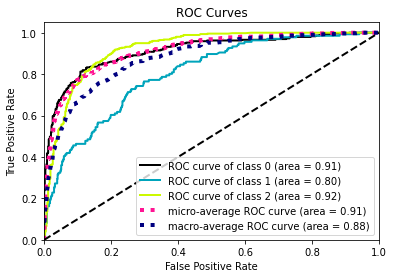

In [29]:
y_probas = model_rf.predict_proba(X_val)
skplt.metrics.plot_roc(y_val, y_probas)
plt.show()

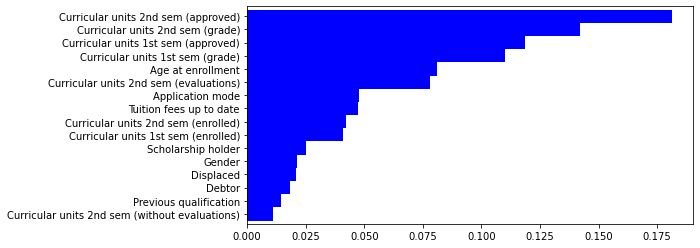

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(model_rf.feature_importances_, feature_df.columns ).sort_values(ascending=True).plot.barh(width=1, color='b')

plt.show()

## XGBoost 

In [31]:
dt = xgb.DMatrix(X_train, label=y_train)
dv = xgb.DMatrix(X_val, label=y_val)

XGBoost Accuracy: 76.38%
The cross validated score for XGBoost is: 75.62


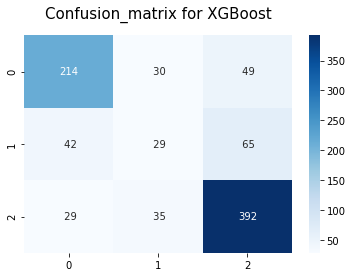

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       293
           1       0.31      0.21      0.25       136
           2       0.77      0.86      0.81       456

    accuracy                           0.72       885
   macro avg       0.61      0.60      0.60       885
weighted avg       0.70      0.72      0.70       885



In [32]:
model_xgb = xgb.XGBClassifier(max_depth=5, n_estimators=200, eval_metric='logloss', n_jobs =-1)
model_xgb.fit(X_train,y_train)
print("XGBoost Accuracy: "+repr(round(model_xgb.score(X_val, y_val) * 100, 2)) + "%")
result_cvs=cross_val_score(model_xgb,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',round(result_cvs.mean()*100,2))
y_pred = cross_val_predict(model_xgb,X_val,y_val,cv=10)
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion_matrix for XGBoost', y=1.05, size=15)
plt.show()
print(classification_report(y_val, y_pred))

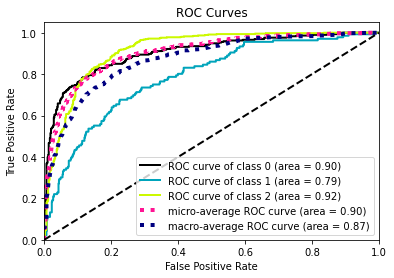

In [33]:
y_probas = model_xgb.predict_proba(X_val)
skplt.metrics.plot_roc(y_val, y_probas)
plt.show()

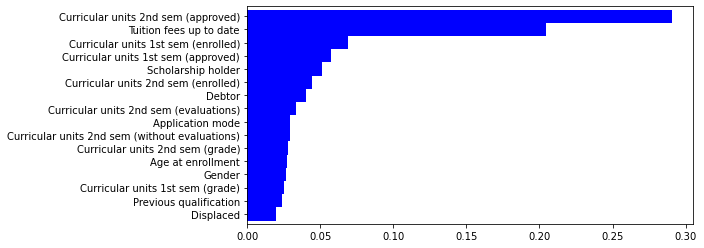

In [34]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(model_xgb.feature_importances_, feature_df.columns ).sort_values(ascending=True).plot.barh(width=1, color='b')

plt.show()

In [35]:
shap.initjs()

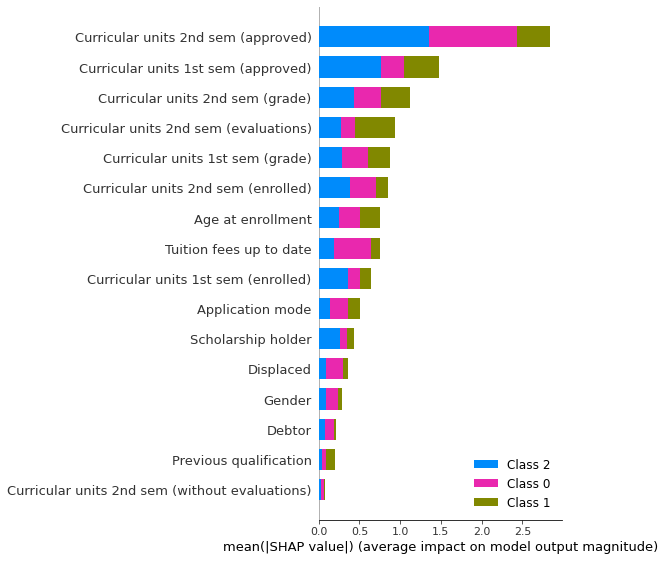

In [36]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_val, check_additivity=False)
shap.summary_plot(shap_values, X_val)

Создадим модель, предсказывающая метку класса 'Enrolled' или других (One vs Rest)

In [37]:
X_enr = feature_df.copy()
y_enr = df['Target'].map(lambda x:0 if x==0 or x==2 else 1)

X_train,X_val,y_train,y_val = train_test_split(X_enr,y_enr,shuffle=True)

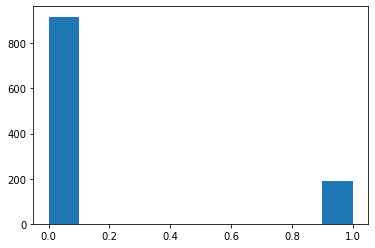

In [38]:
plt.hist(y_val)

plt.show()

RF Accuracy: 81.01%
The cross validated score for Random forest is: 81.98


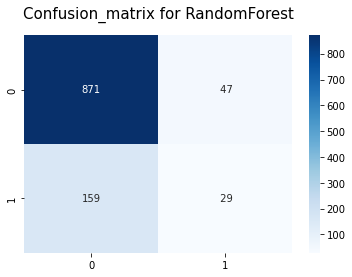

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       918
           1       0.38      0.15      0.22       188

    accuracy                           0.81      1106
   macro avg       0.61      0.55      0.56      1106
weighted avg       0.77      0.81      0.78      1106



In [39]:
model_rf = RandomForestClassifier(n_estimators=250,
                                  criterion='entropy',
                                  oob_score= True, 
                                  random_state= 2023, 
                                  max_depth= 16, 
                                  class_weight='balanced',
                                  n_jobs= -1
                                  
                                
)
model_rf.fit(X_train,y_train)
print("RF Accuracy: "+repr(round(model_rf.score(X_val, y_val) * 100, 2)) + "%")
result_cvs=cross_val_score(model_rf,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_cvs.mean()*100,2))
y_pred = cross_val_predict(model_rf,X_val,y_val,cv=10)
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion_matrix for RandomForest', y=1.05, size=15)
plt.show()
print(classification_report(y_val, y_pred))

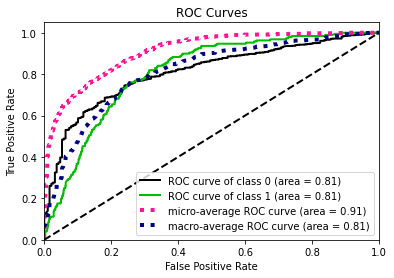

In [40]:
y_probas = model_rf.predict_proba(X_val)
skplt.metrics.plot_roc(y_val, y_probas)
plt.show()

In [41]:
dt = xgb.DMatrix(X_train, label=y_train)
dv = xgb.DMatrix(X_val, label=y_val)

XGBoost Accuracy: 81.65%
The cross validated score for XGBoost is: 81.86


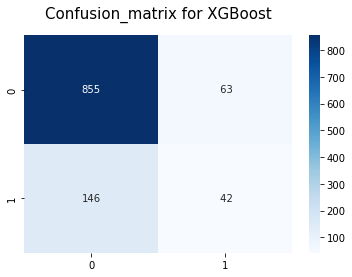

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       918
           1       0.40      0.22      0.29       188

    accuracy                           0.81      1106
   macro avg       0.63      0.58      0.59      1106
weighted avg       0.78      0.81      0.79      1106



In [42]:
model_xgb = xgb.XGBClassifier(max_depth=5, 
                              n_estimators=125, 
                              eval_metric='logloss',
                              random_state=2023
                          )
model_xgb.fit(X_train,y_train)
print("XGBoost Accuracy: "+repr(round(model_xgb.score(X_val, y_val) * 100, 2)) + "%")
result_cvs=cross_val_score(model_xgb,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',round(result_cvs.mean()*100,2))
y_pred = cross_val_predict(model_xgb,X_val,y_val,cv=10)
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion_matrix for XGBoost', y=1.05, size=15)
plt.show()
print(classification_report(y_val, y_pred))

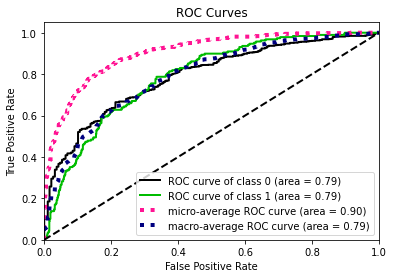

In [43]:
y_probas = model_xgb.predict_proba(X_val)
skplt.metrics.plot_roc(y_val, y_probas)
plt.show()

# Итог 

Наилучшим выбором будет использование модели RandomForest или XGBoost для мультиклассирования.